# Вариант 19, Ягилев

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

/tmp/ipykernel_18875/2597717357.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## График функции

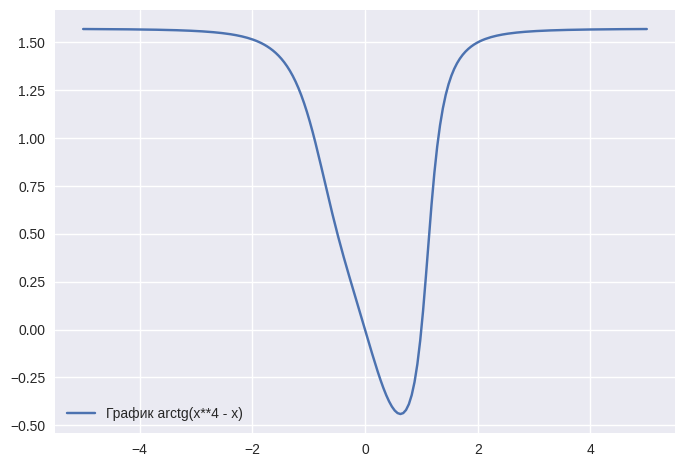

In [4]:
a0, b0 = -5, 5 # Начальный отрезок неопределённости

f_count = 0
# целевая функция
def f_x(x):
    global f_count
    f_count += 1
    return np.arctan(x**4 - x)

# Построение графика функции
x = np.linspace(a0, b0, 200)
plt.plot(x, f_x(x), label='График arctg(x**4 - x)')
plt.legend(loc="best")

#### Функция унимодальная на всей числовой оси. При +- бесконечности стремится к пи/2, имеет один глобальный минимум. Рассмотрим отрезок от -5 до 5.

## Метод дихотомии

### Постановка задачи: 
    Необходимо с помощью программной реализации метода дихотомии минимизировать одномерную целевую функцию на выбанном отрезке [a0, b0] с точностью по аргументу эпсилон.
### Описание Алгоритма:
    Пробные точки на текущем отрезке локализации выбираются со смещением половины константы дельта от середины данного отрезка.
    Новый отрезок локализации выбирается в соответствии с правилом:
    1) Если значение функции в первой пробной точке меньше или равно, значению во второй, то правая граница отрезка смещается во вторую пробную точку.
    2) Если значение функции в первой пробной точке больше, чем во второй, то левая граница отрезка смещается в первую пробную точку.
    3) Вычисления останавливаются тогда, когда длина текущего отрезка локализации становится меньше заданной точности по аргументу эпсилон. Ответ - середина последнего отрезка локализации.
    Таким образом, при параметре дельта, незначительно отличающемся от нуля, получаем некий аналог алгоритма бинарного поиска для поиска на отрезке локального минимума одномерной функции.
### Реализация:

In [5]:
def dichotomy_method(eps, a0, b0, f_x):
    EPS = eps
    DELTA = 0.0001*EPS # Много меньше эпсилон
    MAX_ITER = 3000
    global f_count

    exitflag = -1
    iters = 0
    ak, bk = a0, b0
    for k in range(MAX_ITER):
        # Пробные точки и значения функции в них
        yk = 0.5 * (ak+bk-DELTA)
        zk = 0.5 * (ak+bk+DELTA)
        fyk = f_x(yk)
        fzk = f_x(zk)

        # Новый отрезок неопределённости
        if fyk <= fzk:
            bk = zk
        else:
            ak = yk

        # Длина нового отрезка неопределённости
        d = abs(bk-ak)

        if d < EPS:
            exitflag = 1
            iters = k + 1
            break

    xv = 0.5*(ak+bk)
    fv = f_x(xv)
    msg = f"Найденное решение = {xv}\nЗначение целевой функции = {fv}\n"
    msg += "Достигнуто максимальное количество итераций\n" if exitflag == -1 else f"Получено приближенное решение с точностью = {EPS}\n"
    msg += f"Количество итераций = {iters}\n"
    msg += f"Показатель эффективности E = {1/(2**f_count)**0.5}\n"
    print(msg + f"Количество вызовов целевой функции = {f_count}\n")
    f_count = 0


dichotomy_method(0.1, a0, b0, f_x)
dichotomy_method(0.01, a0, b0, f_x)
dichotomy_method(0.001, a0, b0, f_x)
dichotomy_method(0.000001, a0, b0, f_x)

Найденное решение = 0.6640618359375
Значение целевой функции = -0.4390333177470769
Получено приближенное решение с точностью = 0.1
Количество итераций = 7
Показатель эффективности E = 0.00390625
Количество вызовов целевой функции = 16

Найденное решение = 0.6298827495117187
Значение целевой функции = -0.4413823704881482
Получено приближенное решение с точностью = 0.01
Количество итераций = 10
Показатель эффективности E = 0.0006905339660024878
Количество вызовов целевой функции = 21

Найденное решение = 0.6301879819793701
Значение целевой функции = -0.44138228152857834
Получено приближенное решение с точностью = 0.001
Количество итераций = 14
Показатель эффективности E = 4.3158372875155485e-05
Количество вызовов целевой функции = 29

Найденное решение = 0.6299605965551323
Значение целевой функции = -0.4413823822620174
Получено приближенное решение с точностью = 1e-06
Количество итераций = 24
Показатель эффективности E = 4.214684851089403e-08
Количество вызовов целевой функции = 49



### Вывод:
    Сопоставляя полученные результаты и графическое расположение точки минимума, можно сделать вывод о корректной работе алгоритма.
    Количество вызовов целевой функции можно рассчитать по формуле (2*iters + 1).
    Судя по результатам, при увеличении точности по аргументу, вычислительная устойчивость сохраняется. При увеличении точности на три порядка число итераций практически не изменилось, что связано делением отрезка на два на каждой итерации.

# Метод половинного деления

### Постановка задачи: 
    Необходимо с помощью программной реализации метода половинного деления минимизировать одномерную целевую функцию на выбанном отрезке [a0, b0] с точностью по аргументу эпсилон.
### Описание Алгоритма:
    Три пробные точки на текущем отрезке локализации делят его на четыре равных части.
    Новый отрезок локализации выбирается в соответствии с правилом:
    1) Если значение функции в первой пробной точке меньше или равно, значению во второй, то правая граница отрезка смещается во вторую пробную точку.
    2) Если значение функции в первой пробной точке больше, чем в третьей, то левая граница отрезка смещается во вторую пробную точку.
    3) Если значение функции во второй пробной точке меньше или равно, значению в третьей, то левая граница отрезка смещается в первую пробную точку, а правая смещается в третью.
    4) Вычисления останавливаются тогда, когда длина текущего отрезка локализации становится меньше заданной точности по аргументу эпсилон. Ответ - середина последнего отрезка локализации.
### Реализация:

In [6]:
def half_division_method(eps, a0, b0, f_x):
    EPS = eps
    MAX_ITER = 3000
    global f_count

    exitflag = -1
    iters = 0
    ak, bk = a0, b0
    # предварительное вычисление пробных точек
    xk = 0.5 * (ak+bk)
    yk = 0.5 * (ak+xk)
    zk = 0.5 * (bk+xk)
    fxk = f_x(xk)
    fyk = f_x(yk)
    fzk = f_x(zk)

    for k in range(MAX_ITER):
        # Новый отрезок неопределённости
        if fyk <= fxk:
            bk = xk
            xk = 0.5 * (ak+bk)
            yk = 0.5 * (ak+xk)
            zk = 0.5 * (bk+xk)
            fxk = fyk
            fyk = f_x(yk)
            fzk = f_x(zk)
        elif fxk > fzk:
            ak = xk
            xk = 0.5 * (ak+bk)
            yk = 0.5 * (ak+xk)
            zk = 0.5 * (bk+xk)
            fxk = fzk
            fyk = f_x(yk)
            fzk = f_x(zk)
        elif fxk <= fzk:
            ak = yk
            bk = zk
            yk = 0.5 * (ak+xk)
            zk = 0.5 * (bk+xk)
            fyk = f_x(yk)
            fzk = f_x(zk)

        # Длина нового отрезка неопределённости
        d = abs(bk-ak)

        if d < EPS:
            exitflag = 1
            iters = k + 1
            break

    xv = 0.5*(ak+bk)
    fv = f_x(xv)
    msg = f"Найденное решение = {xv}\nЗначение целевой функции = {fv}\n"
    msg += "Достигнуто максимальное количество итераций\n" if exitflag == -1 else f"Получено приближенное решение с точностью = {EPS}\n"
    msg += f"Количество итераций = {iters}\n"
    msg += f"Показатель эффективности E = {1/(2**f_count)**0.5}\n"
    print(msg + f"Количество вызовов целевой функции = {f_count}\n")
    f_count = 0

half_division_method(0.1, a0, b0, f_x)
half_division_method(0.01, a0, b0, f_x)
half_division_method(0.001, a0, b0, f_x)
half_division_method(0.000001, a0, b0, f_x)

Найденное решение = 0.625
Значение целевой функции = -0.4413347332263043
Получено приближенное решение с точностью = 0.1
Количество итераций = 7
Показатель эффективности E = 0.001953125
Количество вызовов целевой функции = 18

Найденное решение = 0.6298828125
Значение целевой функции = -0.44138237050721046
Получено приближенное решение с точностью = 0.01
Количество итераций = 10
Показатель эффективности E = 0.000244140625
Количество вызовов целевой функции = 24

Найденное решение = 0.6298828125
Значение целевой функции = -0.44138237050721046
Получено приближенное решение с точностью = 0.001
Количество итераций = 14
Показатель эффективности E = 1.52587890625e-05
Количество вызовов целевой функции = 32

Найденное решение = 0.6299605965614319
Значение целевой функции = -0.4413823822620174
Получено приближенное решение с точностью = 1e-06
Количество итераций = 24
Показатель эффективности E = 1.4901161193847656e-08
Количество вызовов целевой функции = 52



### Вывод:
    Сопоставляя полученные результаты и графическое расположение точки минимума, можно сделать вывод о корректной работе алгоритма.
    Количество вызовов целевой функции можно рассчитать по формуле (3 + 2*iters + 1).
    Судя по результатам, при увеличении точности по аргументу, вычислительная устойчивость сохраняется. Показатель эффективности при этом стремится к нулю, стоит отметить, что при тех же исходных условиях, показатель эффективости в методе половинного деления получается того же порядка, как и в методе дихотомии (но чуть меньше), что говорит о небольшом приросте эффективности. При увеличении точности на три порядка число итераций практически не изменилось, что связано делением отрезка на два на каждой итерации.

## Метод золотого сечения

### Постановка задачи: 
    Необходимо с помощью программной реализации метода золотого сечения минимизировать одномерную непрерывную целевую функцию на выбанном отрезке унимодальности [a0, b0] с точностью по аргументу эпсилон.
### Описание Алгоритма:
    Пробные точки на начальном отрезке локализации выбираются по формуле:
    y0 = b0 - (b0 - a0)/tau
    z0 = a0 + (b0 - a0)/tau
    Где tau - пропорция золотого сечения = (1+sqrt(5))/2
    Новый отрезок локализации и пробные точки выбираются в соответствии с правилами:
    1) Если значение функции в первой пробной точке меньше или равно, значению во второй, то правая граница отрезка смещается во вторую пробную точку и:
    zk+1 = yk
    yk+1 = bk+1 - (bk+1 - ak+1)/tau
    2) Если значение функции в первой пробной точке больше, чем во второй, то левая граница отрезка смещается в первую пробную точку и:
    yk+1 = zk
    zk+1 = ak+1 + (bk+1 - ak+1)/tau
    3) Вычисления останавливаются тогда, когда длина текущего отрезка локализации становится меньше заданной точности по аргументу эпсилон. Ответ - середина последнего отрезка локализации.
### Реализация:

In [7]:
def golden_section_method(eps, a0, b0, f_x):
    EPS = eps
    MAX_ITER = 3000
    TAU = 0.5 * (1 + 5 ** 0.5) # пропорция золотого сечения
    global f_count

    exitflag = -1
    iters = 0
    ak, bk = a0, b0
    # Пробные точки на начальном отрезке локализации
    yk = bk - (bk-ak) / TAU
    zk = ak + (bk-ak) / TAU
    fyk = f_x(yk)
    fzk = f_x(zk)
    for k in range(MAX_ITER):
        # Новый отрезок неопределённости
        if fyk <= fzk:
            bk = zk
            zk = yk
            yk = bk - (bk-ak) / TAU
            fzk = fyk
            fyk = f_x(yk)
        else:
            ak = yk
            yk = zk
            zk = ak + (bk-ak) / TAU
            fyk = fzk
            fzk = f_x(zk)

        # Длина нового отрезка неопределённости
        d = abs(bk-ak)

        if d < EPS:
            exitflag = 1
            iters = k+1
            break

    xv = 0.5*(ak+bk)
    fv = f_x(xv)
    msg = f"Найденное решение = {xv}\nЗначение целевой функции = {fv}\n"
    msg += "Достигнуто максимальное количество итераций\n" if exitflag == -1 else f"Получено приближенное решение с точностью = {EPS}\n"
    msg += f"Количество итераций = {iters}\n"
    msg += f"Показатель эффективности E = {TAU**(1-f_count)}\n"
    print(msg + f"Количество вызовов целевой функции = {f_count}\n")
    f_count = 0

golden_section_method(0.1, a0, b0, f_x)
golden_section_method(0.01, a0, b0, f_x)
golden_section_method(0.001, a0, b0, f_x)
golden_section_method(0.000001, a0, b0, f_x)

Найденное решение = 0.6134620938630382
Значение целевой функции = -0.4408615913564534
Получено приближенное решение с точностью = 0.1
Количество итераций = 10
Показатель эффективности E = 0.0031056200151418573
Количество вызовов целевой функции = 13

Найденное решение = 0.6312557132076715
Значение целевой функции = -0.441379112380274
Получено приближенное решение с точностью = 0.01
Количество итераций = 15
Показатель эффективности E = 0.0002800335820725826
Количество вызовов целевой функции = 18

Найденное решение = 0.6300598270423508
Значение целевой функции = -0.441382363065049
Получено приближенное решение с точностью = 0.001
Количество итераций = 20
Показатель эффективности E = 2.5250612343448544e-05
Количество вызовов целевой функции = 23

Найденное решение = 0.6299606908330669
Значение целевой функции = -0.44138238226197385
Получено приближенное решение с точностью = 1e-06
Количество итераций = 34
Показатель эффективности E = 2.995331895054832e-08
Количество вызовов целевой функц

### Вывод:
    Сопоставляя полученные результаты и графическое расположение точки минимума, можно сделать вывод о корректной работе алгоритма.
    Количество вызовов целевой функции можно рассчитать по формуле (2 + iters + 1).
    Судя по результатам, при увеличении точности по аргументу, вычислительная устойчивость сохраняется. Показатель эффективности при этом стремится к нулю. При увеличении точности на три порядка порядок числа итераций не изменился.
    Так как число итераций оказалось не велико, мы получили, что метод золотого сечения оказался более эффективен, чем метод дихотомии, но менее эффективен, чем метод половинного деления.

## Метод Фибоначчи

### Постановка задачи: 
    Необходимо с помощью программной реализации метода Фибоначчи минимизировать одномерную непрерывную целевую функцию на выбанном отрезке унимодальности [a0, b0] с точностью по аргументу эпсилон.
### Описание Алгоритма:
    Находим число n - количество итераций, где Fn удовлетворяет условию: Fn >= (b0 - a0) / EPS, также находим соответствующие члены полседовательности Фибоначчи.
    Пробные точки на начальном отрезке локализации выбираются по формуле:
    y0 = a0 + (b0 - a0)*(Fn-2/Fn)
    z0 = b0 - (b0 - a0)*(Fn-2/Fn)
    Новый отрезок локализации и пробные точки выбираются в соответствии с правилами:
    1) Если значение функции в первой пробной точке меньше или равно, значению во второй, то правая граница отрезка смещается во вторую пробную точку и:
    zk+1 = yk
    yk+1 = ak+1 + (bk+1 - ak+1)*(Fn-k-3/Fn-k-1)
    2) Если значение функции в первой пробной точке больше, чем во второй, то левая граница отрезка смещается в первую пробную точку и:
    yk+1 = zk
    zk+1 = bk+1 - (bk+1 - ak+1)*(Fn-k-3/Fn-k-1)
    3) Вычисления останавливаются при k = n-3 и:
    yk+1 = yn-1 = yn-2 = zn-2 = zk+1
    zn-1 = yn-1 + дельта (параметр, много меньший эпсилон)
    Если f(yn-1) <= f(z-1), правая граница последнего отрезка локализации смещается в точку zn-1.
    Иначе - левая граница последнего отрезка локализации смещается в точку yn-1.
    Ответ - середина последнего отрезка локализации
### Реализация:

In [8]:
# Получение последовательности Фибоначчи, где последний член: Fn >= |ak-bk|/EPS
def get_fibonacci_seq(arg):
    fib1 = 1
    fib2 = 1
    res_seq = [fib1, fib2]
    while True:
        fib_sum = fib1 + fib2
        res_seq.append(fib_sum)
        if fib_sum >= arg:
            break
        fib1 = fib2
        fib2 = fib_sum
    return res_seq


def fibonacci_method(eps, a0, b0, f_x):
    EPS = eps
    DELTA = 0.0001 * EPS
    MAX_ITER = 3000
    global f_count

    ak, bk = a0, b0

    # Необходимая последовательно Фибоначчи
    fib_seq = get_fibonacci_seq(abs(ak-bk)/EPS)  
    # Пробные точки на начальном отрезке локализации
    yk = ak + fib_seq[-3]/fib_seq[-1]*(bk-ak)
    zk = bk - fib_seq[-3]/fib_seq[-1]*(bk-ak)
    fyk = f_x(yk)
    fzk = f_x(zk)
    N = len(fib_seq)
    print(f"Количество членов в последовательности Фибоначчи = {N}")

    for k in range(N-3):
        # Новый отрезок неопределённости
        if fyk <= fzk:
            bk = zk
            zk = yk
            yk = ak + fib_seq[-4-k]/fib_seq[-2-k]*(bk-ak)
            fzk = fyk
            fyk = f_x(yk)
        else:
            ak = yk
            yk = zk
            zk = bk - fib_seq[-4-k]/fib_seq[-2-k]*(bk-ak)
            fyk = fzk
            fzk = f_x(zk)

        # Критерий остановки счёта
        if k == N-3:
            zk = yk + DELTA
            if f_x(yk) <= f_x(zk):
                bk = zk
            else:
                ak = yk

    xv = 0.5*(ak+bk)
    fv = f_x(xv)
    msg = f"Найденное решение = {xv}, с точностью {EPS}\nЗначение целевой функции = {fv}\n"
    msg += f"Показатель эффективности E = {1/fib_seq[-1]}\n"
    print(msg + f"Количество вызовов целевой функции = {f_count}\n")
    f_count = 0


fibonacci_method(0.1, a0, b0, f_x)
fibonacci_method(0.01, a0, b0, f_x)
fibonacci_method(0.001, a0, b0, f_x)
fibonacci_method(0.000001, a0, b0, f_x)

Количество членов в последовательности Фибоначчи = 12
Найденное решение = 0.625, с точностью 0.1
Значение целевой функции = -0.4413347332263043
Показатель эффективности E = 0.006944444444444444
Количество вызовов целевой функции = 12

Количество членов в последовательности Фибоначчи = 17
Найденное решение = 0.6293049467752037, с точностью 0.01
Значение целевой функции = -0.44138154623902964
Показатель эффективности E = 0.0006261740763932373
Количество вызовов целевой функции = 17

Количество членов в последовательности Фибоначчи = 21
Найденное решение = 0.6303672574456423, с точностью 0.001
Значение целевой функции = -0.44138206009940567
Показатель эффективности E = 9.13575735428467e-05
Количество вызовов целевой функции = 21

Количество членов в последовательности Фибоначчи = 36
Найденное решение = 0.6299603653015013, с точностью 1e-06
Значение целевой функции = -0.4413823822619778
Показатель эффективности E = 6.697765732515884e-08
Количество вызовов целевой функции = 36



### Вывод:
    Сопоставляя полученные результаты и графическое расположение точки минимума, можно сделать вывод о корректной работе алгоритма.
    Количество вызовов целевой функции совпадает с количеством членов в полученной последовательности Фибоначчи.
    Судя по результатам, при увеличении точности по аргументу, вычислительная устойчивость сохраняется. Показатель эффективности при этом стремится к нулю. Мы получили, что показатель эффективности сходится с тем же порядком, что и в других методах, но именно этот метод является наиболее оптимальным, так как, в сравнении с рассмотренными выше методами, при одинаковом числе итераций мы получем отрезок локализации меньшей длины.

## Минимизация функции с помощью квадратического сплайна

### Постановка задачи: 
    Необходимо с помощью программной реализации квадратичной интерполяции минимизировать одномерную непрерывную целевую функцию на выбанном отрезке унимодальности [a0, b0] с точностью эпсилон - по функции и дельта - по аргументу.
### Описание Алгоритма:
    1) Задаём начальную точку x1, величину шага и точности;
    2) x2 = x1 + h;
    3) y1 = f(x1), y2 = f(x2);
    4) Если y1 > y2, x3 = x1 + 2h,
       Если y1 <= y2, x3 = x1 - h;
    5) y3 = f(y3);
    6) Находим минимальный y и соответствующий ему x;
    7) Находим точку минимума xp интерполяционного полинома Лагранжа, построенного по трём точкам x, находя соответствующие коэффициенты альфа и бета, также находим yp = f(xp). 
    Если beta = 0, то x1 = минимальный из x, переходим на шаг 2;
    8) Проверяем критерий остановки:
    Условие 1 = |y_min - yp| < EPS, Условие 2 = |x_min - xp| < DELTA
        - Если оба условия выполнены, конец счёта, xp - ответ;
        - Если не выполнено хотя бы одно условие и xp принадлежит отрезку [x1, x3], то выбираем лучшую точку (x_min или xp) и две точки по обе стороны от неё, переходим к шагу 6;
        - Если не выполнено хотя бы одно условие и xp не принадлежит отрезку [x1, x3], то x1 = xp, переходим к шагу 2.
### Реализация:

In [9]:
def quad_inter(eps, delta, x0, h, fx):
    EPS = eps
    DELTA = delta
    MAX_ITER = 3000
    global f_count

    exitflag = -1
    iters = 0
    x1 = x0
    # Конечный ответ
    xv = 0
    fv = 0

    for k in range(MAX_ITER):
        # Условия выхода
        if exitflag == 1:
            break
        iters += 1
        if iters > MAX_ITER:
            exitflag = -1
            break
        # Пробные точки и значения функции в них
        x2 = x1 + h
        y1 = f_x(x1)
        y2 = f_x(x2)

        if y1 > y2:
            x3 = x2 + h
        else:
            x3 = x1 - h
        y3 = f_x(x3)

        val_y = [y1, y2, y3]
        val_x = [x1, x2, x3]
        while True:
            f_min = min(val_y)
            x_min = val_x[val_y.index(f_min)]

            # Коэффициенты для предполагаемой точки минимума
            alpha, beta = 0, 0
            for j in range(3):
                j2 = j + 1
                if j2 >= 3:
                    j2 = 0
                j3 = j2 + 1
                if j3 >= 3:
                    j3 = 0
                alpha += val_y[j] * (val_x[j2]**2 - val_x[j3]**2)
                beta += val_y[j] * (val_x[j2] - val_x[j3])

            try:
                xp = 0.5 * alpha / beta
            except ZeroDivisionError:
                x1 = x_min
                break

            fp = f_x(xp)
            # Критерии остановки счёта
            Cond1 = (abs(f_min-fp) < EPS)
            Cond2 = (abs(x_min-xp) < DELTA)

            if Cond1 and Cond2:
                exitflag = 1
                xv, fv = xp, fp
                break
            else:
                val_x = sorted(val_x)
                if xp >= val_x[0] and xp <= val_x[-1]:
                    val_x[1] = xp if fp < f_min else x_min
                    val_y = [f_x(el) for el in val_x]
                else:
                    x1 = xp
                    break
    msg = f"x0={x0}, h={h}\n"
    msg += f"Найденное решение = {xv}\nЗначение целевой функции = {fv}\n"
    msg += "Достигнуто максимальное количество итераций\n" if exitflag == -1 else f"Получено приближенное решение с точностью по функции = {EPS}, с точностью по аргументу = {DELTA}\n"
    msg += f"Количество итераций = {iters}\n"
    print(msg + f"Количество вызовов целевой функции = {f_count}\n")
    f_count = 0


quad_inter(eps=0.1, delta=0.1, x0=1, h=0.01, fx=f_x)
quad_inter(eps=0.1, delta=0.1, x0=1, h=0.00001, fx=f_x)
quad_inter(eps=0.000001, delta=0.1, x0=1, h=0.01, fx=f_x)
quad_inter(eps=0.1, delta=0.000001, x0=1, h=0.01, fx=f_x)

x0=1, h=0.01
Найденное решение = 0.6529836872970317
Значение целевой функции = -0.44032467341082165
Получено приближенное решение с точностью по функции = 0.1, с точностью по аргументу = 0.1
Количество итераций = 2
Количество вызовов целевой функции = 8

x0=1, h=1e-05
Найденное решение = 0.65310104510838
Значение целевой функции = -0.4403137254291156
Получено приближенное решение с точностью по функции = 0.1, с точностью по аргументу = 0.1
Количество итераций = 2
Количество вызовов целевой функции = 8

x0=1, h=0.01
Найденное решение = 0.6299078781903368
Значение целевой функции = -0.44138237686705206
Получено приближенное решение с точностью по функции = 1e-06, с точностью по аргументу = 0.1
Количество итераций = 4
Количество вызовов целевой функции = 20

x0=1, h=0.01
Найденное решение = 0.6299078781903368
Значение целевой функции = -0.44138237686705206
Получено приближенное решение с точностью по функции = 0.1, с точностью по аргументу = 1e-06
Количество итераций = 4
Количество вызово

### Вывод:
    Сопоставляя полученные результаты и графическое расположение точки минимума, можно сделать вывод о корректной работе алгоритма.
    Судя по результатам, при увеличении точности по функции и аргументу, вычислительная устойчивость сохраняется.
    Также можно заметить, что количество итераций и вызовов целевой функций не велико, что связано с быстрой сходимостью алгоритма.